<a href="https://colab.research.google.com/github/sanju492/first_project/blob/main/Copy_of_Supervised_Learning_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Training Dataset

In [ ]:
training_data = pd.read_csv("/content/Training_data.csv")
training_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [ ]:
training_data.shape

(5634, 21)

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [ ]:
training_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [ ]:
training_data.nunique()

,0
customerID,5634
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
training_data.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


Testing Datset

In [ ]:
testing_data = pd.read_csv("/content/Testing_data.csv")
testing_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [ ]:
testing_data.shape

(1409, 21)

In [ ]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [ ]:
testing_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1409.000000,1409.000000,1409.000000
mean,0.171753,31.428673,63.898013
std,0.377300,24.322161,30.282693
min,0.000000,0.000000,18.700000
25%,0.000000,8.000000,30.100000
50%,0.000000,27.000000,69.900000
75%,0.000000,54.000000,89.500000
max,1.000000,72.000000,118.600000


In [ ]:
testing_data.nunique()

,0
customerID,1409
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
testing_data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


#Exploratory Data Analysis (EDA)

EDA - Training Dataset

In [ ]:
num_cols = training_data.select_dtypes(include=['int64','float64'])
cat_cols = training_data.select_dtypes(include='object')

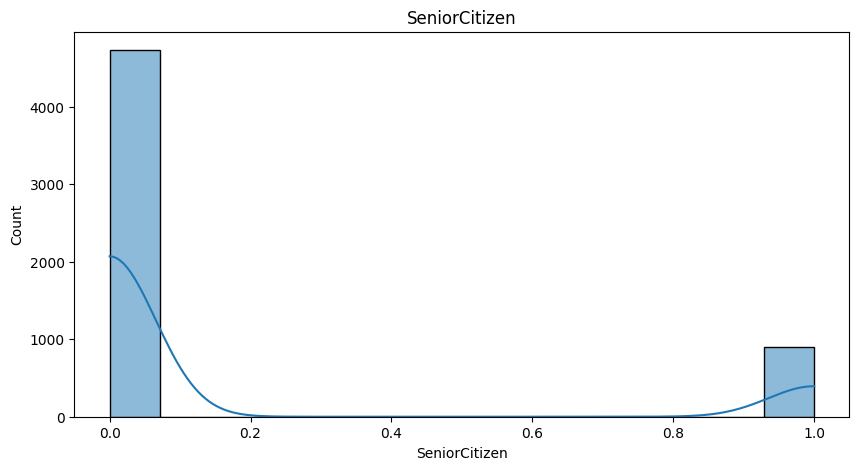

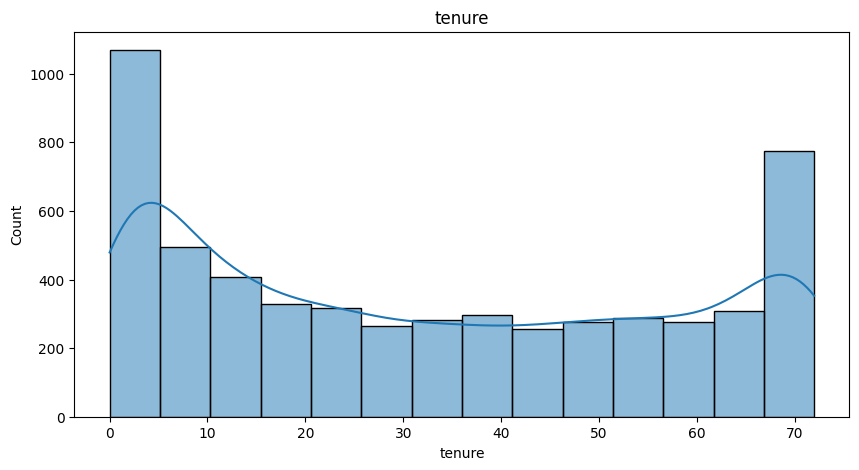

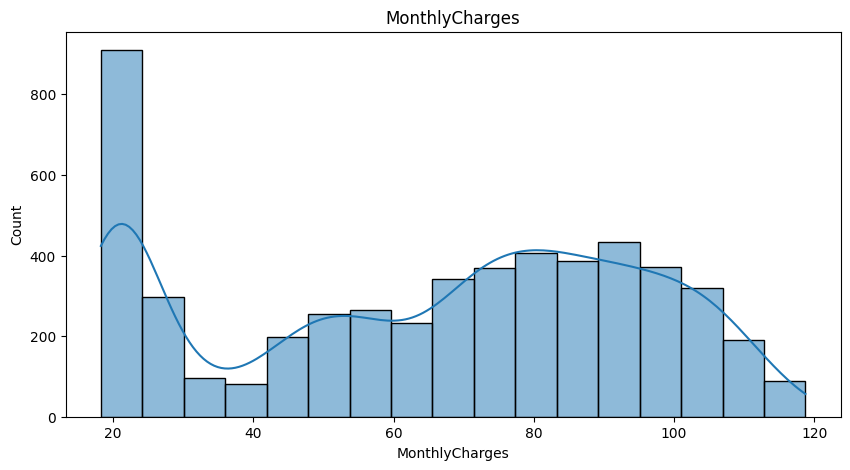

In [ ]:
# Histogramplot for Numerical Dataset

for i in num_cols:
  plt.figure(figsize=(10,5))
  sns.histplot(data = training_data, x =i, kde = True)
  plt.title(i)

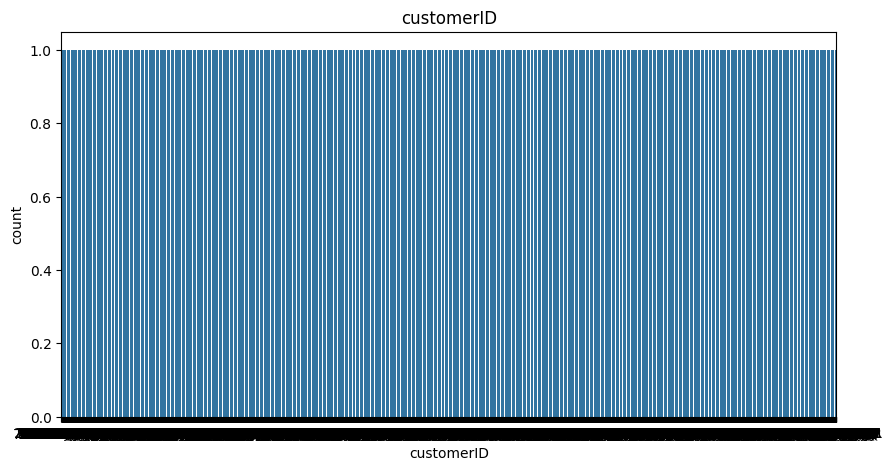

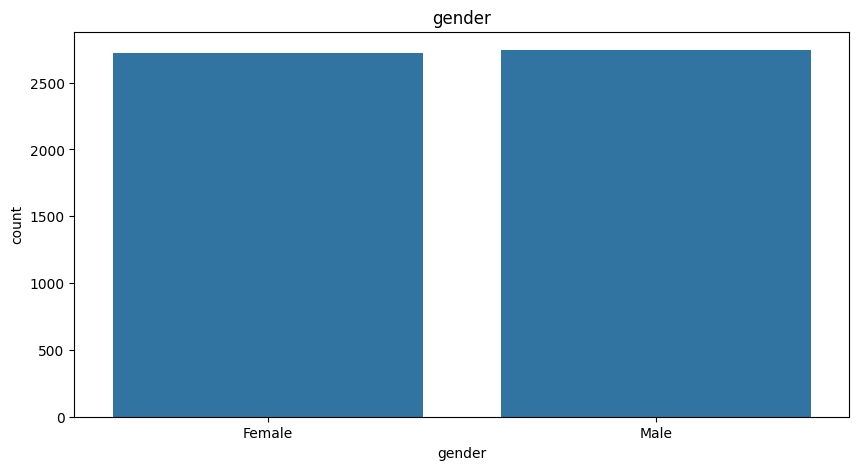

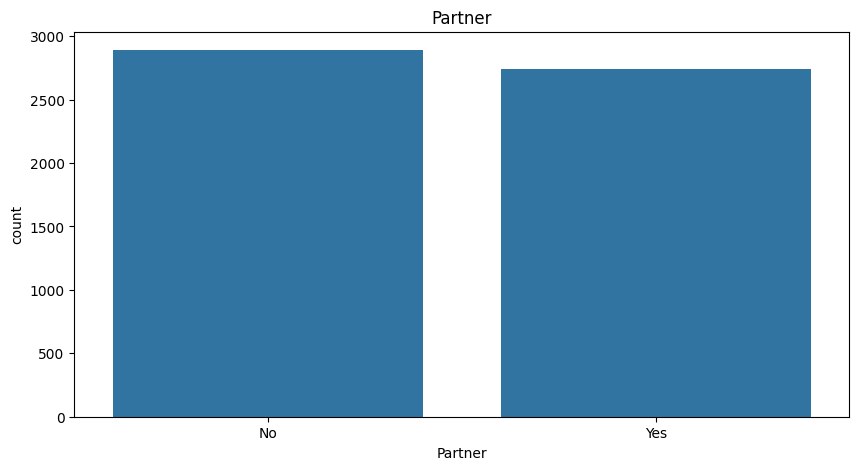

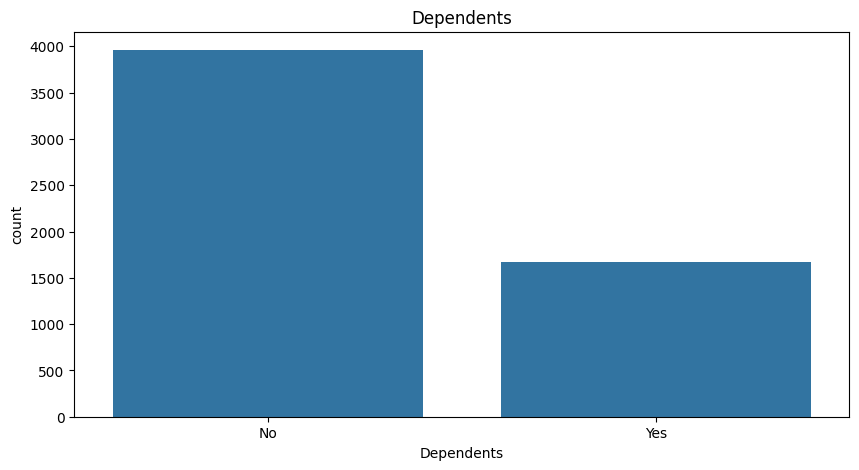

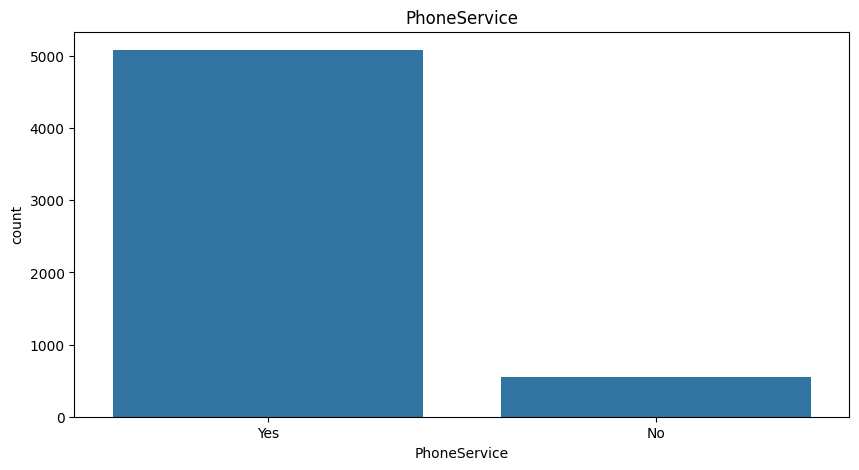

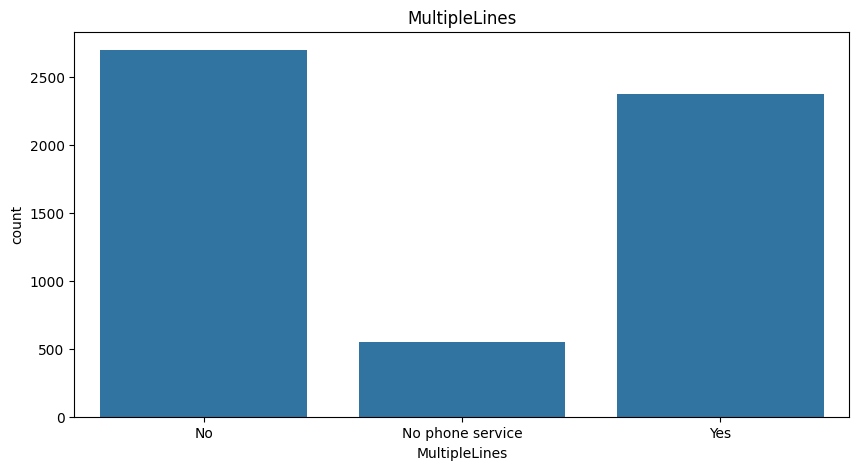

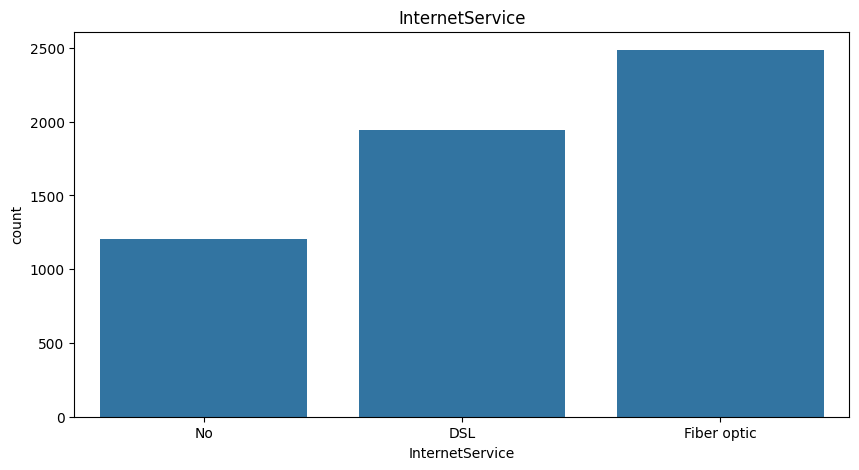

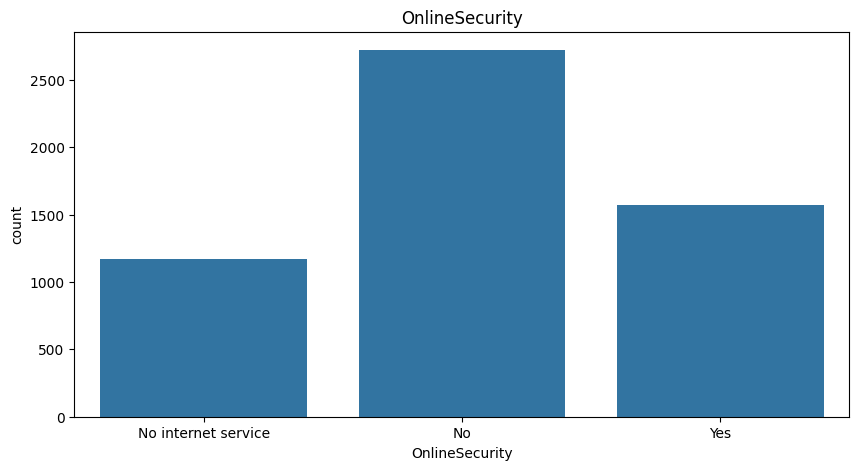

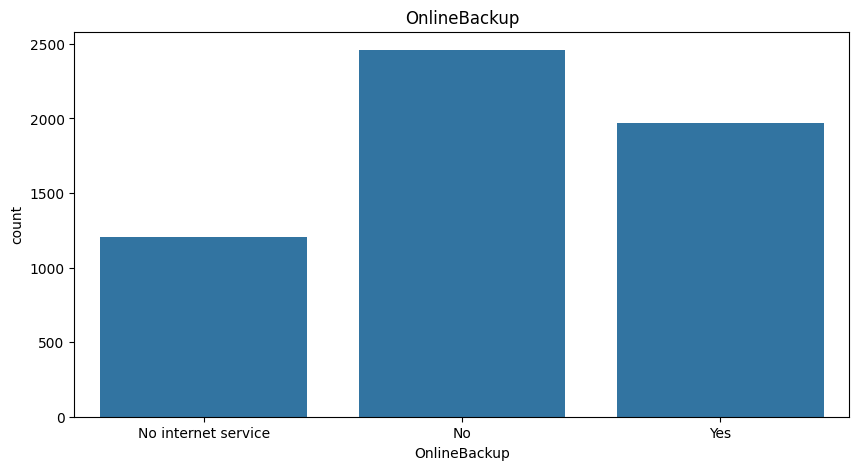

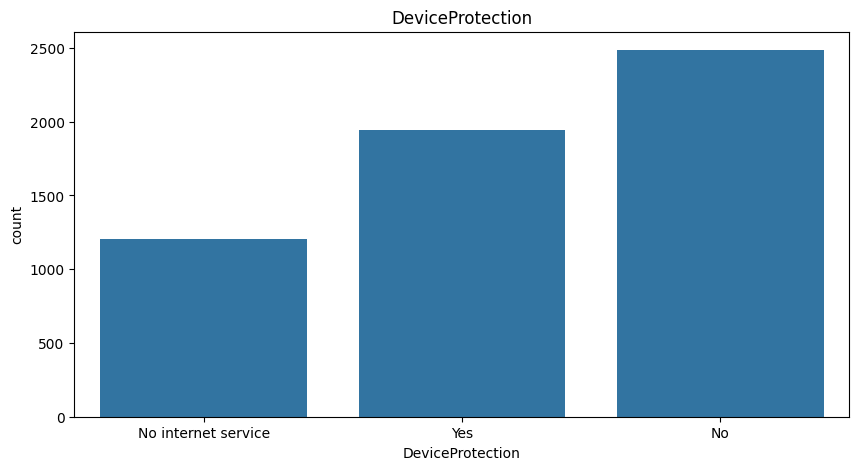

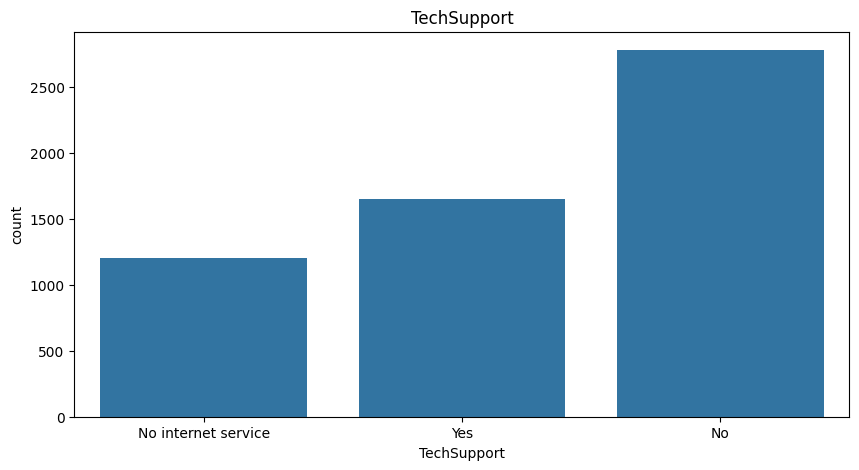

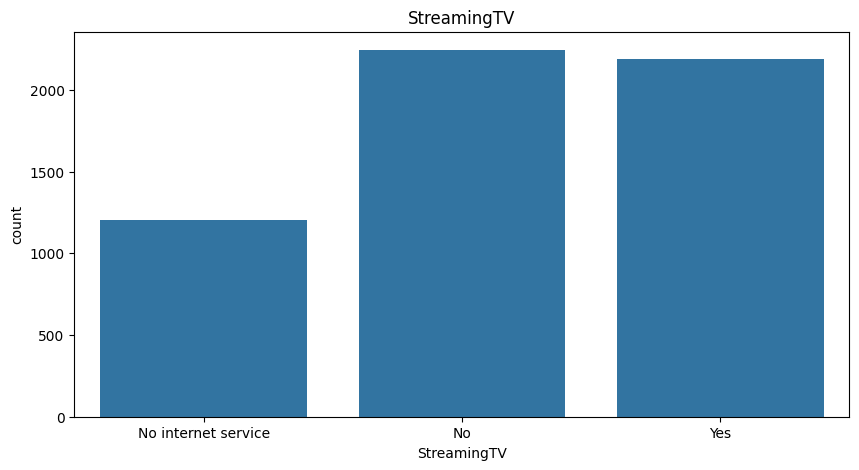

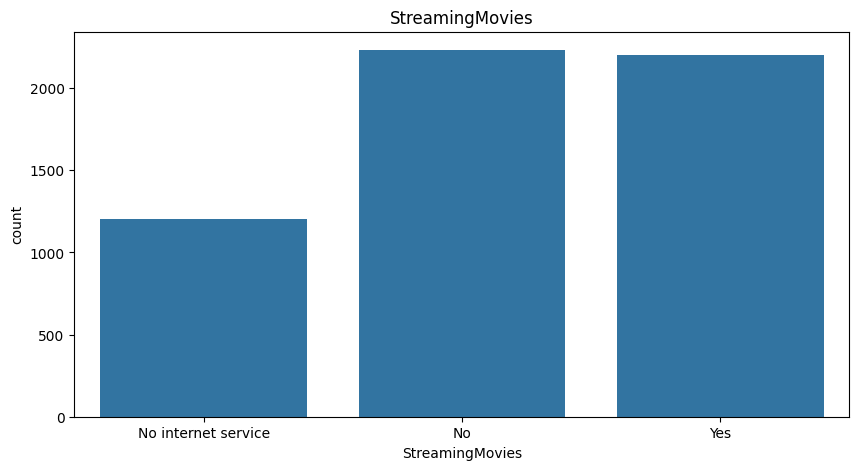

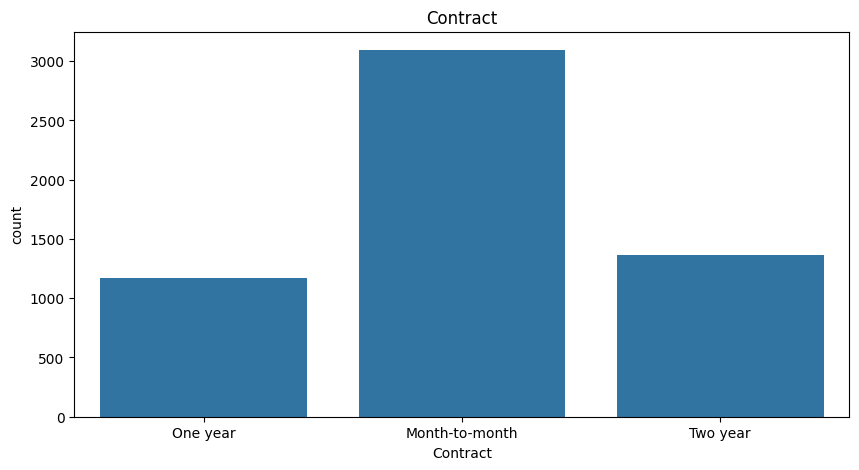

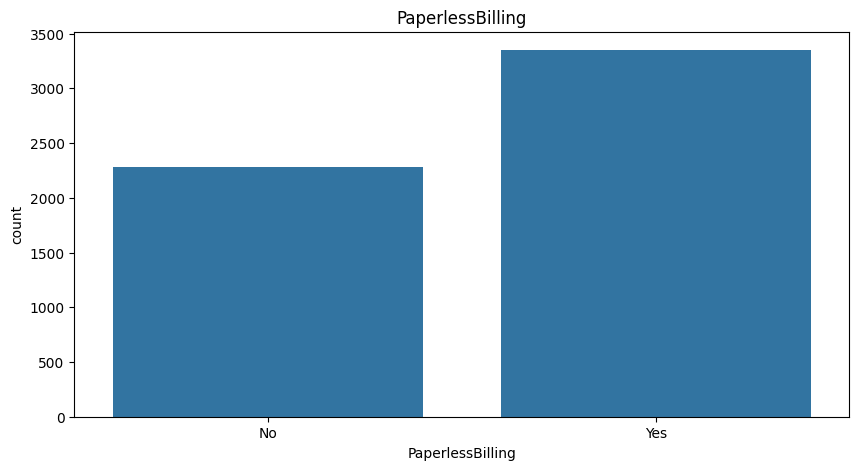

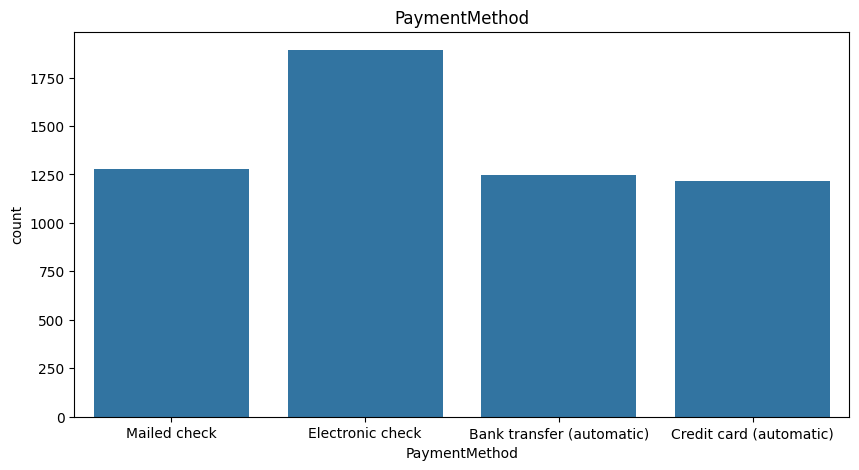

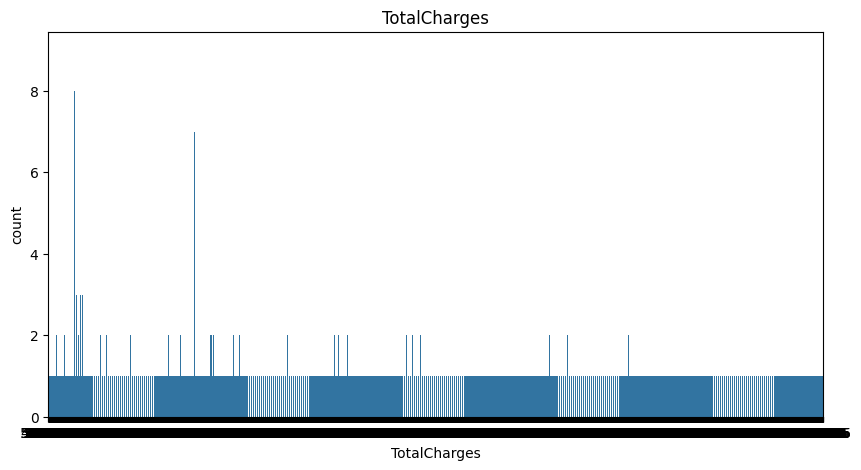

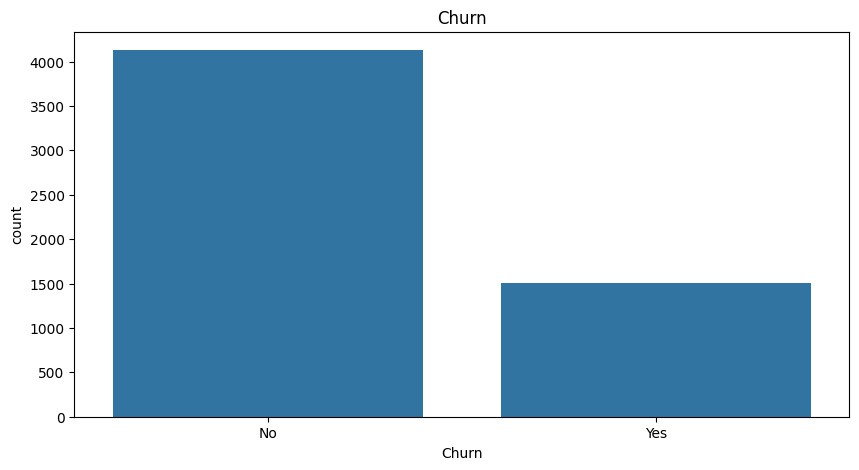

In [ ]:
#Countplot for categorical data

for i in cat_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x =training_data[i])
  plt.title(i)

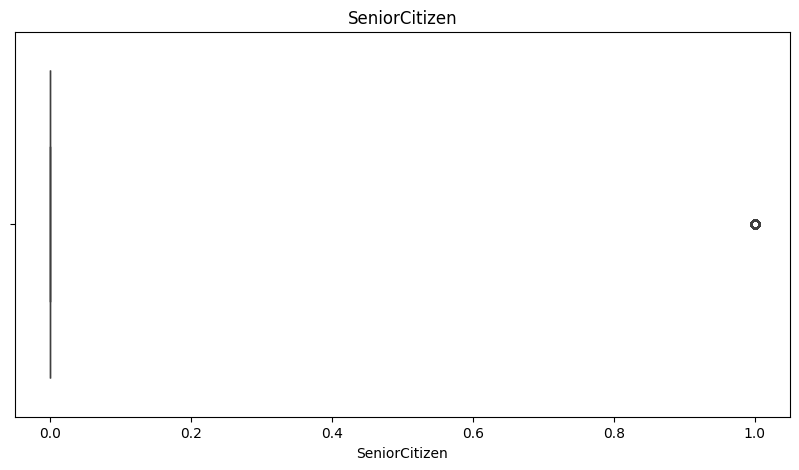

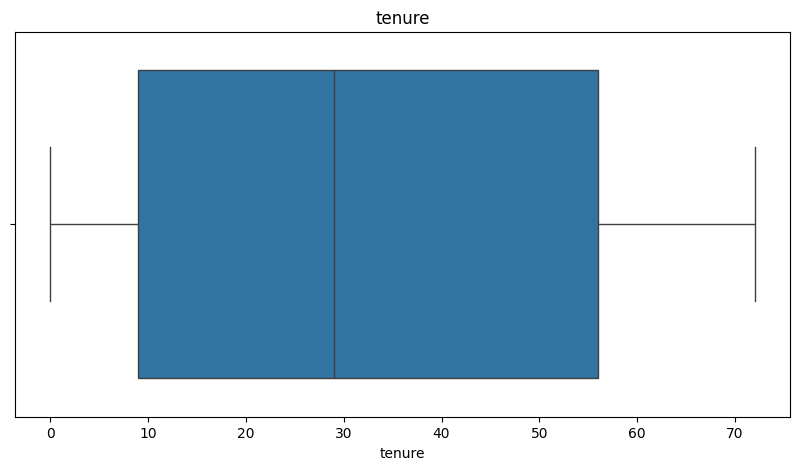

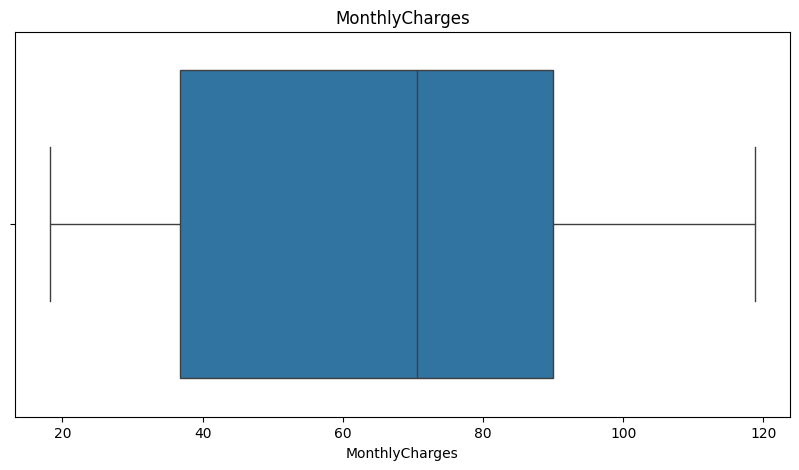

In [ ]:
# Boxplot

for i in num_cols:
  plt.figure(figsize=(10,5))
  sns.boxplot(data = training_data, x=i)
  plt.title(i)
  plt.show()

EDA - Testing Dataset

In [ ]:
numcols_test = testing_data.select_dtypes(include=['int64','float64'])
catcols_test = testing_data.select_dtypes(include='object')

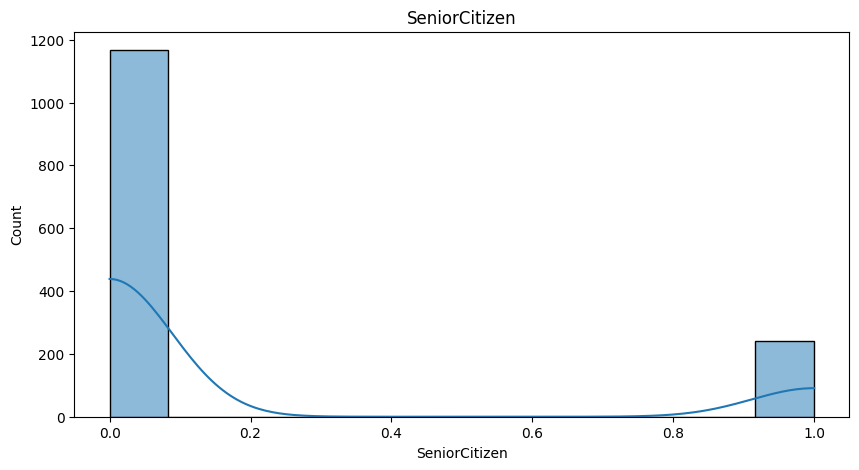

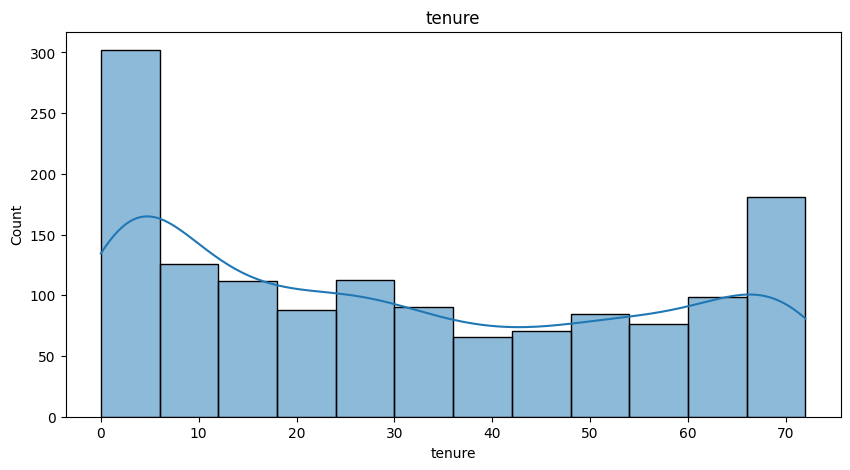

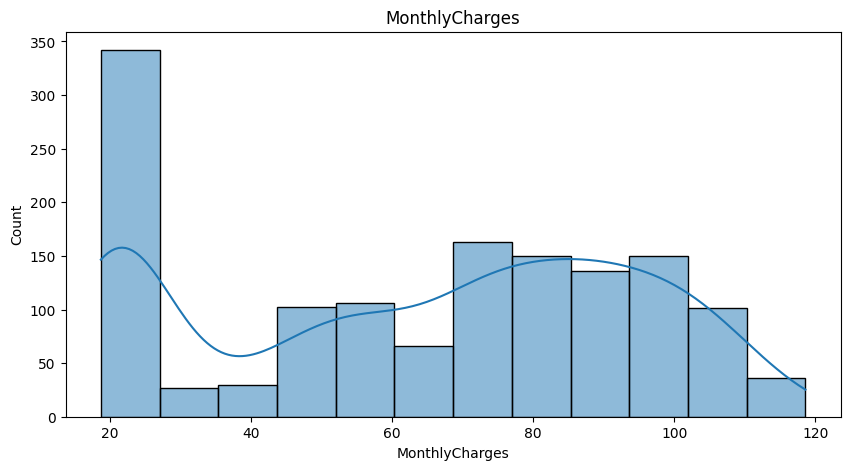

In [ ]:
# Histogramplot for Numerical Dataset

for i in numcols_test:
  plt.figure(figsize=(10,5))
  sns.histplot(data = testing_data, x =i, kde = True)
  plt.title(i)

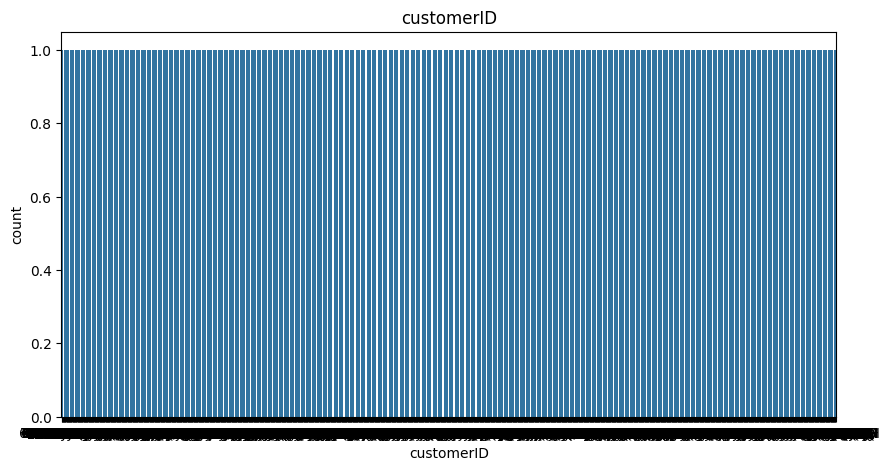

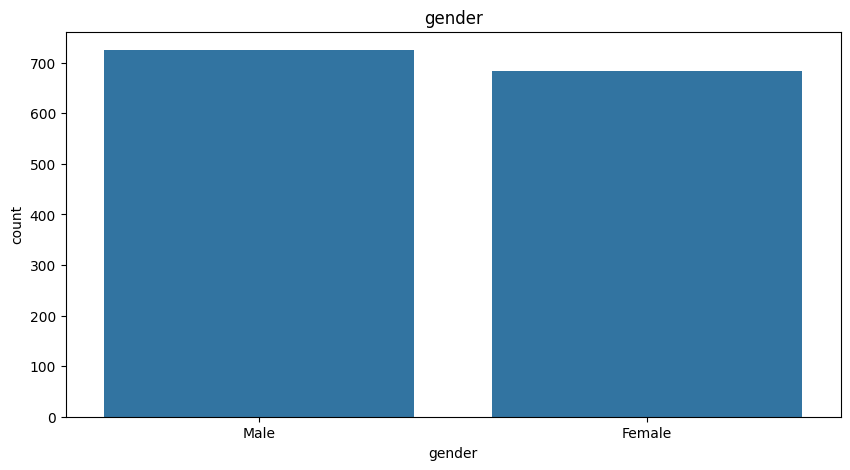

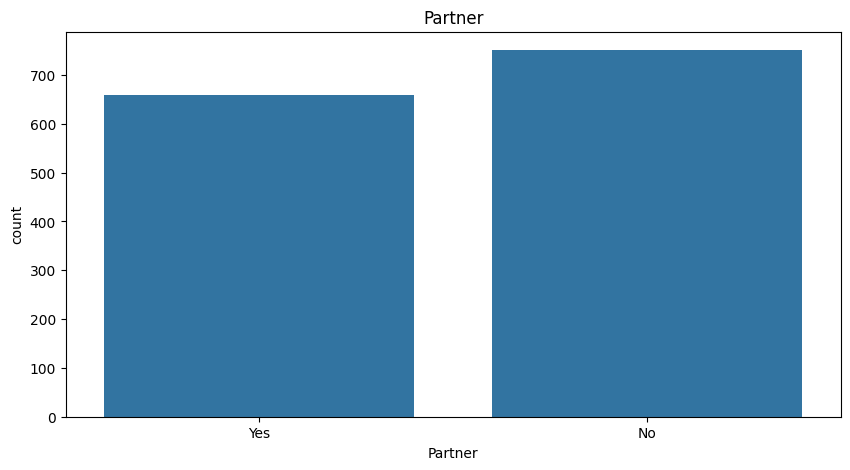

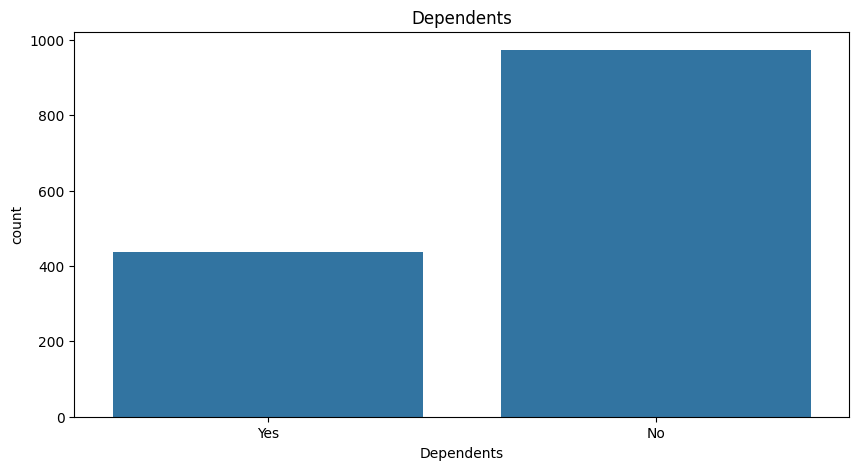

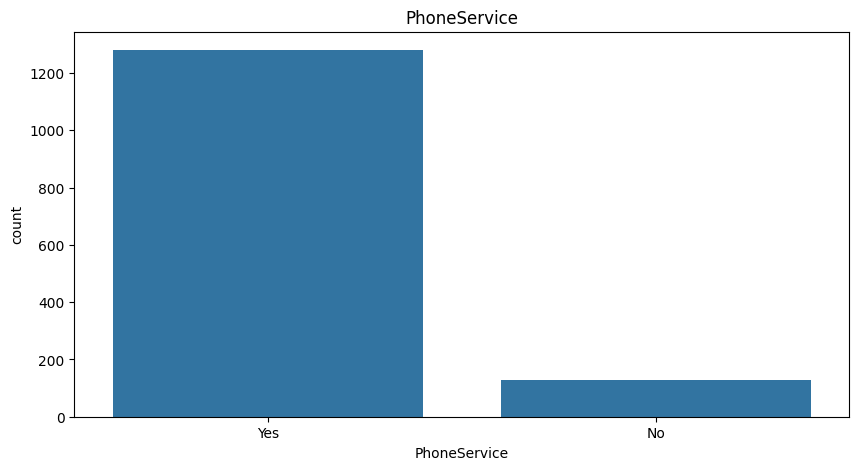

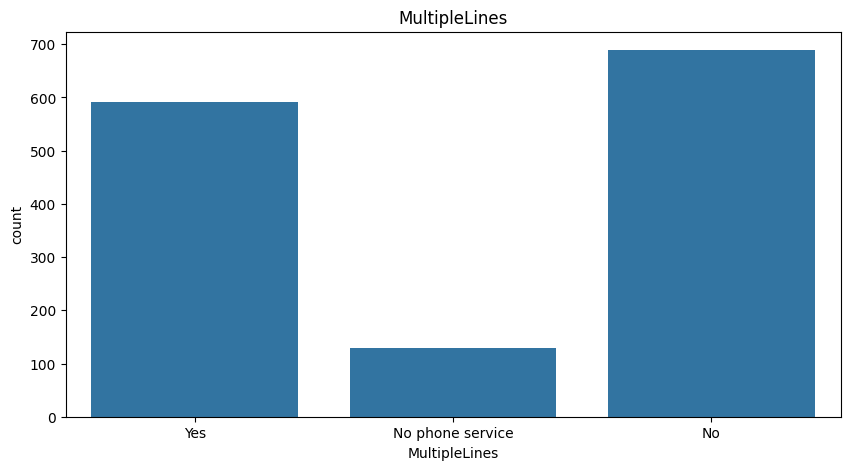

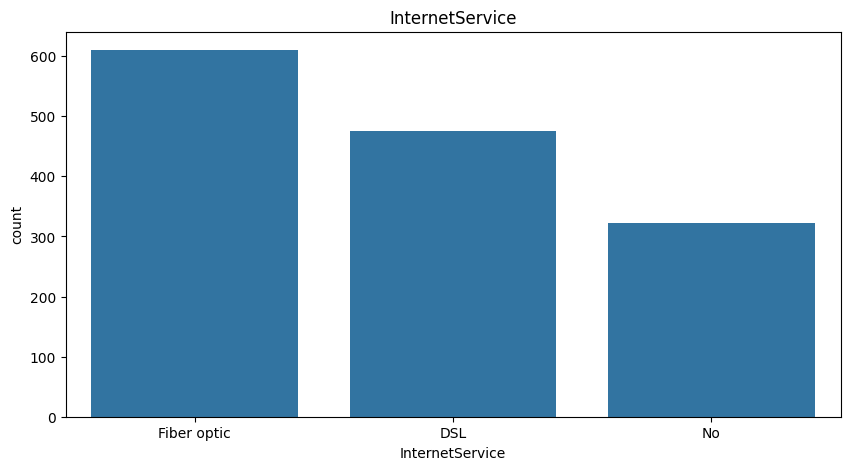

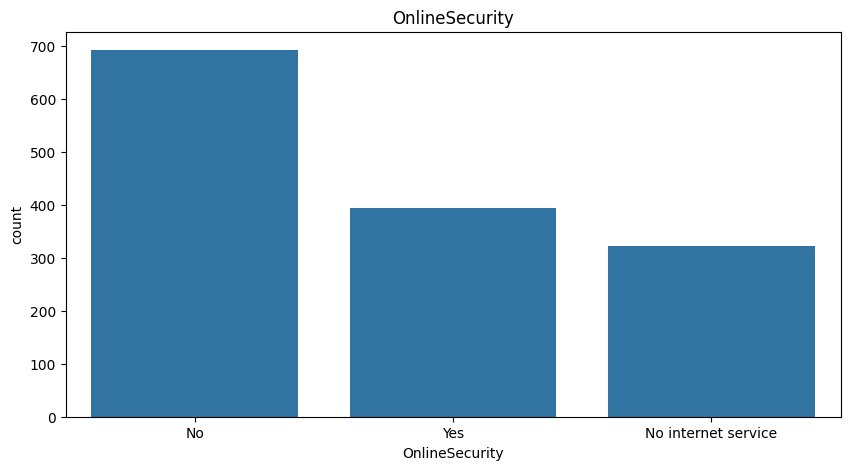

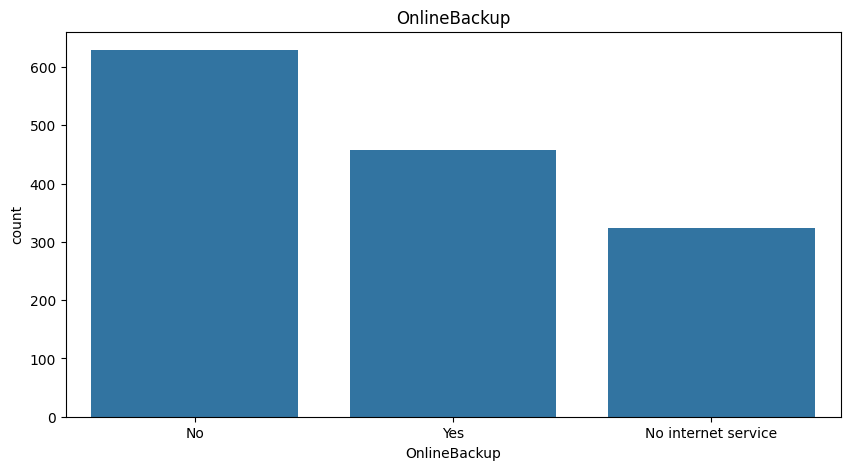

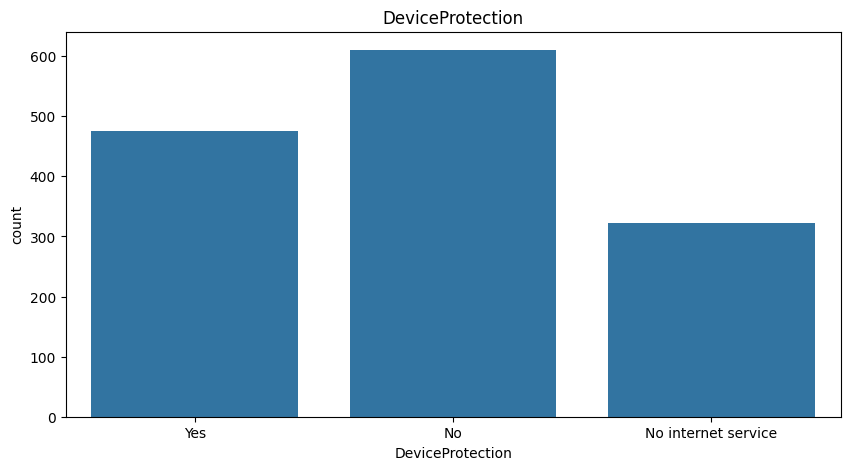

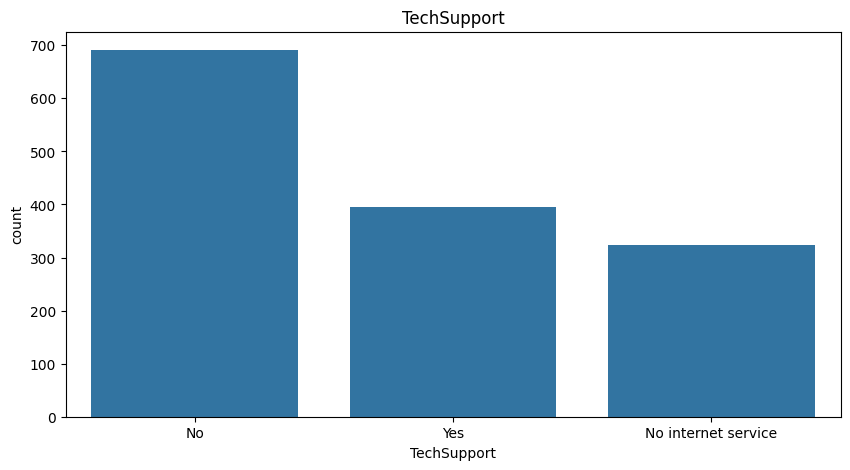

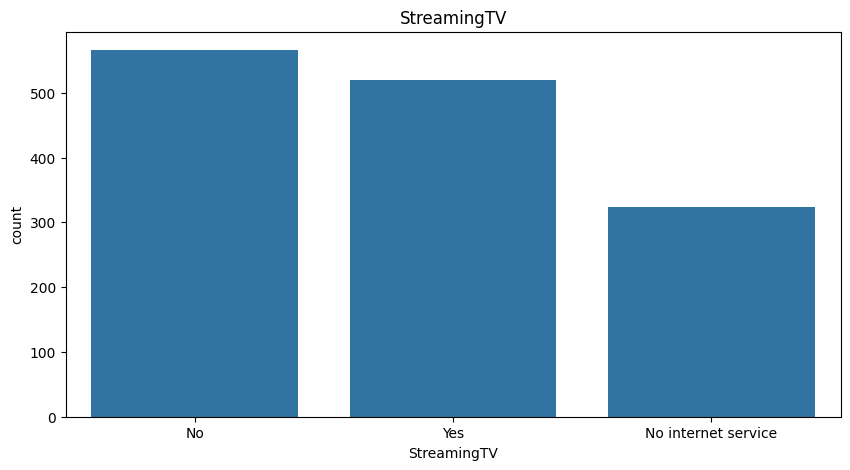

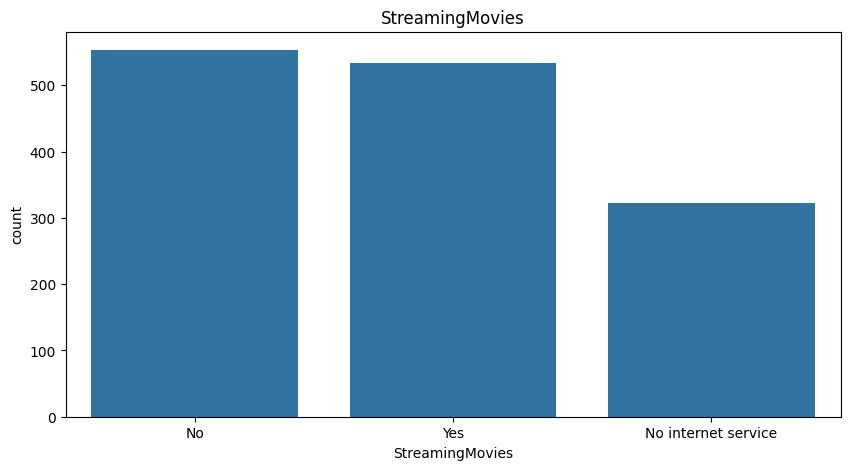

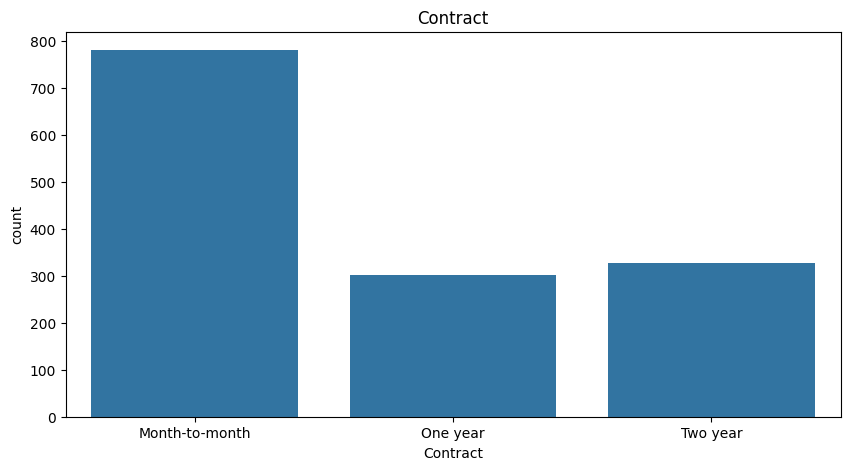

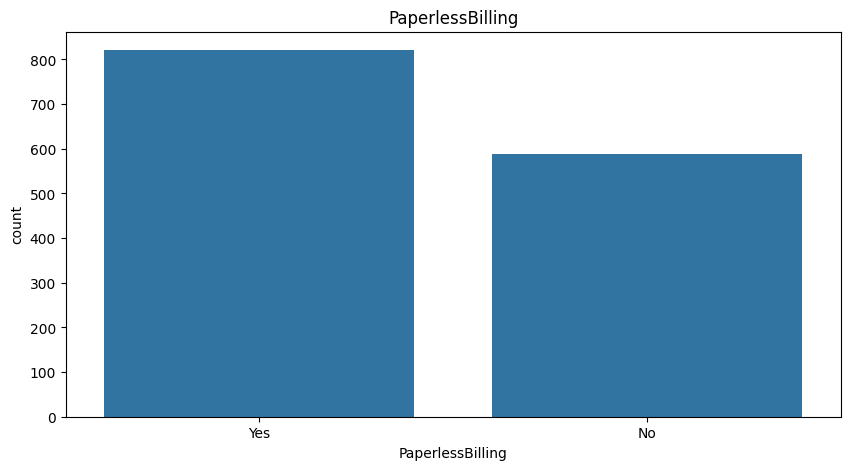

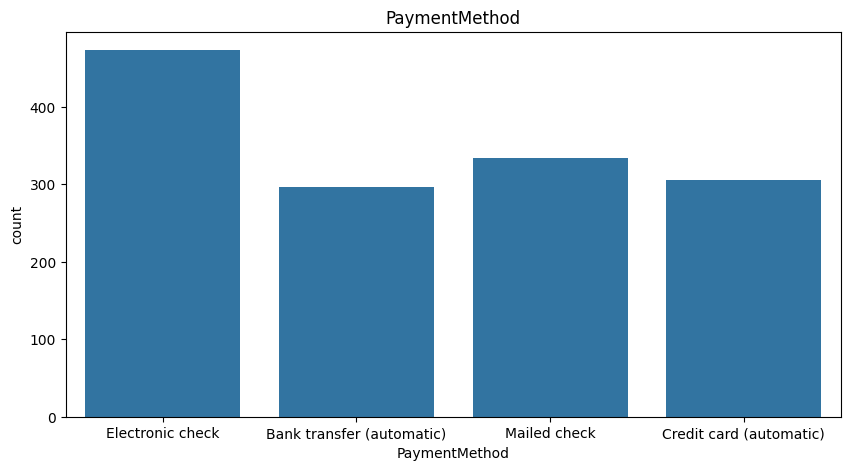

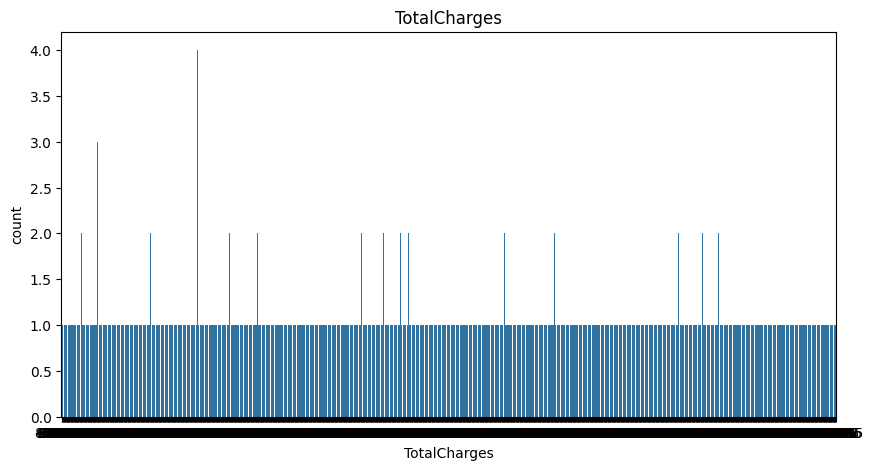

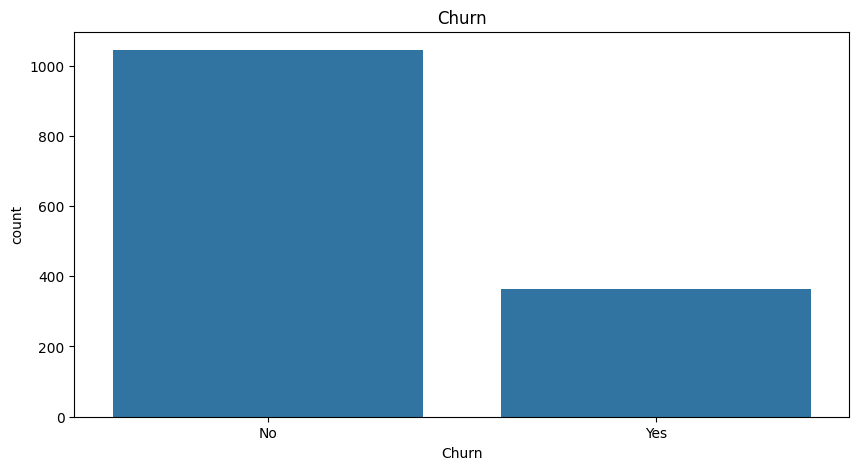

In [ ]:
#Countplot for categorical data

for i in catcols_test:
  plt.figure(figsize=(10,5))
  sns.countplot(x =testing_data[i])
  plt.title(i)

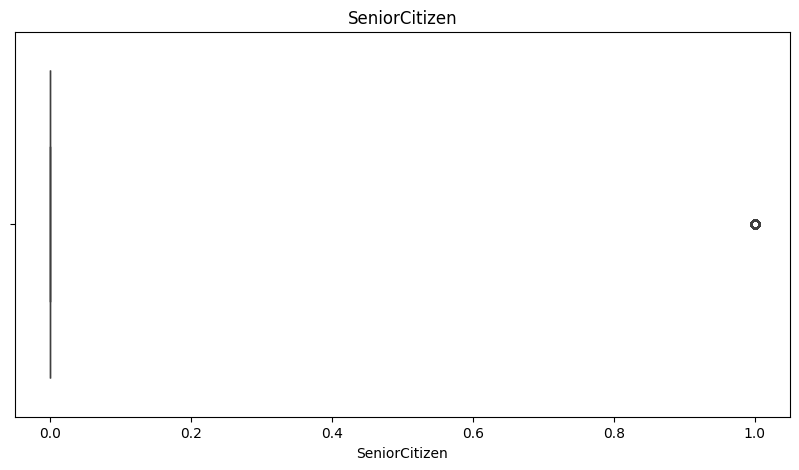

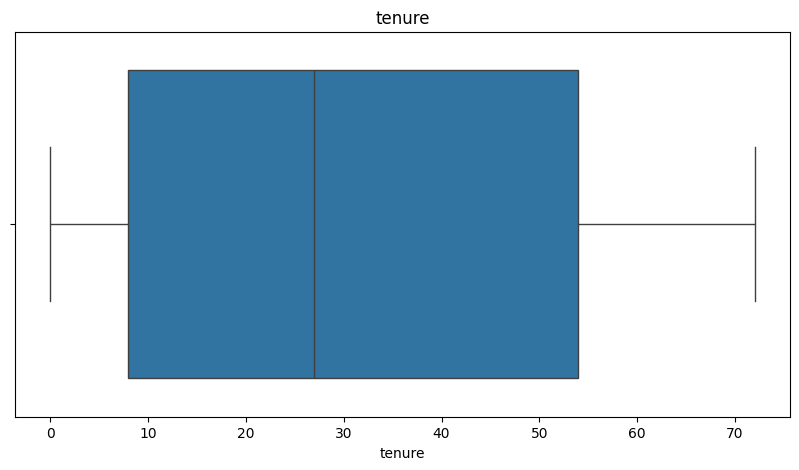

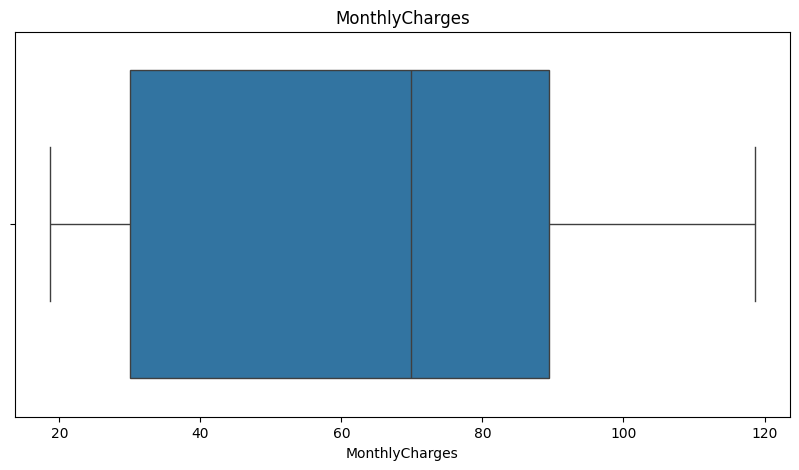

In [ ]:
# Boxplot

for i in numcols_test:
  plt.figure(figsize=(10,5))
  sns.boxplot(data = testing_data, x=i)
  plt.title(i)


# Handle Missing Values

**Handling Missing Value in Training dataset**

In [ ]:
training_data.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [ ]:
pd.value_counts(training_data['gender'])

/tmp/ipython-input-3529972207.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(training_data['gender'])


,count
gender,
Male,2744
Female,2721


In [ ]:
# Clean 'gender' column: fill missing with mode

training_data['gender'] = training_data['gender'].fillna(training_data['gender'].mode()[0])

In [ ]:
# Fill missing 'OnlineSecurity' with 'No internet service' where InternetService is 'No'

training_data.loc[(training_data['OnlineSecurity'].isna())&(training_data['InternetService']=='No'),'OnlineSecurity'] = 'No internet service'

In [ ]:
count = training_data.groupby('InternetService')['OnlineSecurity'].value_counts()
print(count)

InternetService  OnlineSecurity     
DSL              No                      955
                 Yes                     921
Fiber optic      No                     1765
                 Yes                     653
No               No internet service    1203
Name: count, dtype: int64


In [ ]:
import random

# Clean 'OnlineSecurity' column: fill missing with random function

online_security_option = ['Yes','No']
training_data['OnlineSecurity'] = training_data['OnlineSecurity'].fillna(random.choice(online_security_option))

In [ ]:
# Clean 'MonthlyCharges' column: fill missing with median

training_data['MonthlyCharges'] = training_data['MonthlyCharges'].fillna(training_data['MonthlyCharges'].median())

In [ ]:
 # Clean 'TotalCharges' column: replace blanks with NaN, convert to float, and fill missing with median

training_data['TotalCharges'] = training_data['TotalCharges'].replace(' ', np.nan)
training_data['TotalCharges'] = training_data['TotalCharges'].astype(float)
training_data['TotalCharges'] = training_data['TotalCharges'].fillna(training_data['TotalCharges'].median())

In [ ]:
training_data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#training_data.loc[(training_data['DeviceProtection']=='No internet service'),'DeviceProtection'] = 'No'

In [ ]:
# Replace 'No internet service' with 'No' in selected service-related columns

training_data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']] = training_data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']].replace('No internet service', 'No')

In [ ]:
# Replace 'No phone service' with 'No' in MultipleLines column

training_data.loc[(training_data['MultipleLines']=='No phone service'),'MultipleLines'] = 'No'

In [ ]:
# drop customerID column

training_data = training_data.drop('customerID',axis=1)

In [ ]:
training_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,35,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,20.75,700.45,No
1,Female,0,No,No,28,No,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,No
2,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,Male,0,Yes,No,39,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),20.45,790.00,No
4,Female,0,Yes,Yes,43,No,No,DSL,No,Yes,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),51.25,2151.60,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0,No,No,51,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,Male,1,Yes,No,68,No,No,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,Male,0,Yes,Yes,72,Yes,No,No,No,No,No,No,No,No,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,Female,0,No,No,69,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.30,No


In [ ]:
training_data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


**Handling Missing Values in Testing Dataset**

In [ ]:
testing_data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Clean 'TotalCharges' column: replace blanks with NaN, convert to float, and fill missing with median

testing_data['TotalCharges'] = testing_data['TotalCharges'].replace(' ', np.nan)
testing_data['TotalCharges'] = testing_data['TotalCharges'].astype(float)
testing_data['TotalCharges'] = testing_data['TotalCharges'].fillna(testing_data['TotalCharges'].median())

In [ ]:
# Replace 'No internet service' with 'No' in selected service-related columns

testing_data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']] = testing_data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']].replace('No internet service', 'No')

In [ ]:
# Replace 'No phone service' with 'No' in MultipleLines column

testing_data.loc[(testing_data['MultipleLines']=='No phone service'),'MultipleLines'] = 'No'

In [ ]:
# drop customerID column

testing_data = testing_data.drop('customerID',axis=1)

In [ ]:
testing_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.30,No
1,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,Female,0,No,No,10,No,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,Male,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),55.45,1477.65,No
1405,Female,1,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.40,Yes
1406,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75,Yes
1407,Male,0,Yes,Yes,53,Yes,No,No,No,No,No,No,No,No,One year,No,Credit card (automatic),20.20,1068.15,No


# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enct = LabelEncoder()

**Encoding - Training Dataset**

In [ ]:
binary_datat = training_data.select_dtypes('object')

In [ ]:
# Label encoding

for i in binary_datat:
  training_data[i] = label_enct.fit_transform(training_data[i])

In [ ]:
training_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,35,1,0,2,0,0,0,0,0,0,1,0,3,20.75,700.45,0
1,0,0,0,0,28,0,0,0,0,0,1,1,0,0,0,1,3,35.75,961.40,0
2,1,0,0,0,56,1,1,1,0,1,0,0,1,1,0,0,2,98.60,5581.05,0
3,1,0,1,0,39,1,0,2,0,0,0,0,0,0,2,1,0,20.45,790.00,0
4,0,0,1,1,43,0,0,0,0,1,0,1,0,1,1,1,0,51.25,2151.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1,0,0,0,51,1,0,1,0,1,1,0,1,1,0,1,2,99.00,5038.15,0
5630,1,1,1,0,68,0,0,0,1,1,1,0,0,0,2,1,2,41.95,2965.75,0
5631,1,0,1,1,72,1,0,2,0,0,0,0,0,0,2,0,0,19.95,1322.85,0
5632,0,0,0,0,69,1,0,0,0,0,1,1,1,1,2,1,1,82.45,5555.30,0


**Encoding - Testing Dataset**

In [ ]:
binary_datatest = testing_data.select_dtypes('object')

In [ ]:
# Label encoding

for i in binary_datatest:
  testing_data[i] = label_enct.fit_transform(testing_data[i])

In [ ]:
testing_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,40,1,1,1,0,0,1,0,0,0,0,1,2,81.20,3292.30,0
1,0,0,1,0,12,1,1,0,1,0,1,0,1,1,1,0,2,78.85,876.75,0
2,1,0,0,0,43,1,1,1,0,0,0,1,1,1,1,1,2,100.00,4211.55,1
3,1,0,0,0,72,1,1,1,1,1,1,1,1,1,2,1,2,118.20,8547.15,0
4,0,0,0,0,10,0,0,0,0,1,0,1,0,0,0,0,2,36.25,374.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1,0,0,0,27,1,0,0,1,1,0,0,0,0,1,0,0,55.45,1477.65,0
1405,0,1,0,0,2,1,1,1,0,0,0,0,0,0,0,1,3,75.45,158.40,1
1406,0,0,1,0,3,1,1,1,0,0,0,0,0,0,0,1,1,75.15,216.75,1
1407,1,0,1,1,53,1,0,2,0,0,0,0,0,0,1,0,1,20.20,1068.15,0


Split the dataset into train and test

In [ ]:
ytrain = training_data['Churn']
xtrain = training_data.drop(['Churn'],axis=1)
ytest = testing_data['Churn']
xtest = testing_data.drop(['Churn'],axis=1)

# Scaling

Checking the skewness

In [ ]:
from scipy.stats import skew

skewness_value = skew(training_data[['tenure','MonthlyCharges','TotalCharges']])
print(skewness_value)

[ 0.2278836  -0.28373261  1.03904483]


In [ ]:
skewness_value = skew(testing_data[['tenure','MonthlyCharges','TotalCharges']])
print(skewness_value)

[ 0.28543945 -0.18453289  0.9937628 ]


In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

In [ ]:
std_scale = StandardScaler()
min_scale = MinMaxScaler()
power_scale = PowerTransformer()

In [ ]:
xtrain['tenure'] = std_scale.fit_transform(xtrain[['tenure']])
xtest['tenure'] = std_scale.transform(xtest[['tenure']])

In [ ]:
xtrain['MonthlyCharges'] = std_scale.fit_transform(xtrain[['MonthlyCharges']])
xtest['MonthlyCharges'] = std_scale.transform(xtest[['MonthlyCharges']])

In [ ]:
xtrain['TotalCharges'] = power_scale.fit_transform(xtrain[['TotalCharges']])
xtest['TotalCharges'] = power_scale.transform(xtest[['TotalCharges']])

# Model Development

**1. Logistic Regression**

Train Logistic Regression, make predictions on test set, and evaluate performance using accuracy, precision, recall, F1, and confusion matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(xtrain,ytrain)
predictlg = logic.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, accuracy_score
print("Accuracy is",accuracy_score(ytest,predictlg))
print("Precision is",precision_score(ytest,predictlg))
print("Recall is",recall_score(ytest,predictlg))
print("f1 is",f1_score(ytest,predictlg))

Accuracy is 0.8097941802696949
Precision is 0.6701754385964912
Recall is 0.5232876712328767
f1 is 0.5876923076923077


In [ ]:
confusion_matrix(ytest,predictlg)

array([[950,  94],
       [174, 191]])

**2. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,50)

In [ ]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=1)
  classifier.fit(xtrain,ytrain)
  pred_k = classifier.predict(xtest)
  accu = accuracy_score(ytest,pred_k)
  metric_k.append(accu)

In [ ]:
confusion_matrix(ytest,pred_k)

array([[919, 125],
       [159, 206]])

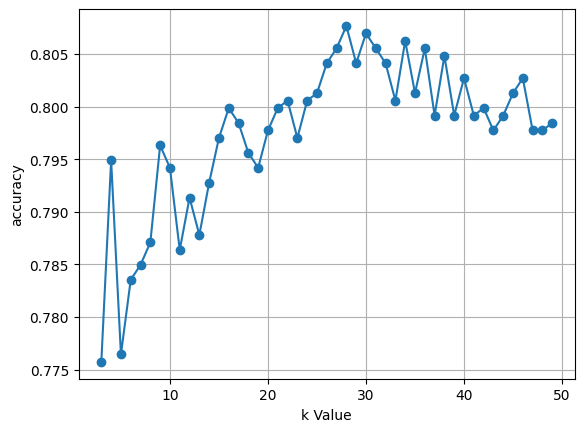

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=16,metric='minkowski',p=1)
classifier.fit(xtrain,ytrain)
pred_nr = classifier.predict(xtest)

In [ ]:
print("Accuracy is",accuracy_score(ytest,pred_nr))
print("Precision is",precision_score(ytest,pred_nr))
print("Recall is",recall_score(ytest,pred_nr))
print("f1 is",f1_score(ytest,pred_nr))

Accuracy is 0.7998580553584103
Precision is 0.6397306397306397
Recall is 0.5205479452054794
f1 is 0.5740181268882175


**3. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

In [ ]:
decision_clf = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42,min_samples_split=12,splitter='random')
decision_clf.fit(xtrain, ytrain)
y_pred = decision_clf.predict(xtest)


In [ ]:
print("Accuracy:", accuracy_score(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("\nClassification Report:\n", classification_report(ytest, y_pred))

Accuracy: 0.7707594038325053
Confusion Matrix:
 [[901 143]
 [180 185]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1044
           1       0.56      0.51      0.53       365

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



# Model Fine-Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

**1. Logistic Regression**

This indicates that the hyperparameter tuning did not improve test performance in this case.The original parameters may have already been near-optimal for this dataset.

In [ ]:

param_grid = [
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs']},
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10], 'solver': ['saga']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10], 'solver': ['saga'], 'l1_ratio':[0.5]}
]

grid_lr = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='accuracy')
grid_lr.fit(xtrain, ytrain)

print("Best Parameters (LR):", grid_lr.best_params_)
print("Best CV Accuracy (LR):", grid_lr.best_score_)

# Evaluate on test set
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(xtest)


print("\nAccuracy:", accuracy_score(ytest, y_pred_lr))
print("Precision:", precision_score(ytest, y_pred_lr))
print("Recall:", recall_score(ytest, y_pred_lr))
print("F1:", f1_score(ytest, y_pred_lr))


Best Parameters (LR): {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Accuracy (LR): 0.8013842373770883

Accuracy: 0.8097941802696949
Precision: 0.6701754385964912
Recall: 0.5232876712328767
F1: 0.5876923076923077


**2. KNN**

In this case, the original KNN setup (possibly with a smaller k) was better for accuracy.
The tuned model may be slightly more stable but sacrifices a bit of accuracy.

In [ ]:


# Define hyperparameter grid
param_grid = {
    'n_neighbors': range(3, 50, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# GridSearchCV for KNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_knn.fit(xtrain, ytrain)

print("Best Parameters (KNN):", grid_knn.best_params_)
print("Best CV Accuracy (KNN):", grid_knn.best_score_)

# Evaluate on test set
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(xtest)
print("\nAccuracy:", accuracy_score(ytest, y_pred_knn))
print("Precision:", precision_score(ytest, y_pred_knn))
print("Recall:", recall_score(ytest, y_pred_knn))
print("F1:", f1_score(ytest, y_pred_knn))


Best Parameters (KNN): {'n_neighbors': 27, 'p': 1, 'weights': 'uniform'}
Best CV Accuracy (KNN): 0.7981929380345918

Accuracy: 0.8055358410220014
Precision: 0.6366366366366366
Recall: 0.5808219178082191
F1: 0.6074498567335244


**3. Decision Tree**

Tuning refined the Decision Tree, reduced overfitting, and slightly improved accuracy while maintaining interpretability, though gains are modest.

In [ ]:

# Define hyperparameter grid
param_grid = {
    'max_depth': [5, 8, 12, 15, None],
    'min_samples_split': [2, 5, 10, 12],
    'min_samples_leaf': [1, 2, 5, 10],
    'splitter': ['best', 'random']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_dt.fit(xtrain, ytrain)

print("Best Parameters (DT):", grid_dt.best_params_)
print("Best CV Accuracy (DT):", grid_dt.best_score_)

# Evaluate on test set
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(xtest)
print("\nAccuracy:", accuracy_score(ytest, y_pred_dt))
print("Precision:", precision_score(ytest, y_pred_dt))
print("Recall:", recall_score(ytest, y_pred_dt))
print("F1:", f1_score(ytest, y_pred_dt))



Best Parameters (DT): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}
Best CV Accuracy (DT): 0.7902019066951824

Accuracy: 0.7892122072391767
Precision: 0.6440677966101694
Recall: 0.41643835616438357
F1: 0.5058236272878536


After training and tuning three models Logistic Regression, KNN, and Decision Tree. we found that Logistic Regression gave the highest accuracy and most balanced performance, making it the best choice for predicting customer churn. Decision Tree tuning slightly improved its accuracy and made the model simpler and easier to interpret, which is useful for explaining decisions to stakeholders. KNN, while intuitive, performed better before tuning, suggesting that the original settings were already optimal.

Based on these insights, the business should focus on retaining month-to-month customers, offering tech support, and promoting longer contracts to reduce churn.